# 3.4 Dataset Preprocessing and Gloss Analysis (ISL_CLSRT)

This notebook demonstrates advanced preprocessing steps using the ISL_CLSRT metadata. It includes:
- Data cleaning (missing values, duplicates)
- Gloss and sentence length analysis
- Signer-wise gloss style exploration
- Gloss vocabulary extraction
- Gloss-to-sentence alignment samples


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta.csv')
df.head()


,Sentences,File location,gloss_sequence,signer_id,sample_id
0,it does not make any difference to me,ISL_CSLRT_Corpus\Videos_Sentence_Level\it does...,IT MAKE ANY DIFFERENCE ME DO NOT,6,ISL_0278_S6
1,tell me truth,ISL_CSLRT_Corpus\Videos_Sentence_Level\tell me...,TELL TRUTH,6,ISL_0341_S6
2,do me a favour,ISL_CSLRT_Corpus\Videos_Sentence_Level\do me a...,DO FAVOUR ME,4,ISL_0046_S4
3,do not worry,ISL_CSLRT_Corpus\Videos_Sentence_Level\do not ...,DONOT WORRY,4,ISL_0065_S4
4,do not abuse him,ISL_CSLRT_Corpus\Videos_Sentence_Level\do not ...,HIM ABUSE DONOT,5,ISL_0048_S5


In [13]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1oX4h9Nr-UaAuXGFt_-Fi10RjwURabBjULUrBp2gh0q0/edit#gid=0


In [6]:
df = df.drop_duplicates()
df = df.dropna(subset=['Sentences', 'gloss_sequence'])
df.reset_index(drop=True, inplace=True)


## Gloss and Sentence Length Analysis

In [7]:
df['sentence_len'] = df['Sentences'].apply(lambda x: len(str(x).split()))
df['gloss_len'] = df['gloss_sequence'].apply(lambda x: len(str(x).split()))
df[['sentence_len', 'gloss_len']].describe()


,sentence_len,gloss_len
count,500.000000,500.000000
mean,4.122000,3.114000
std,1.327645,1.019354
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,3.000000
75%,5.000000,3.000000
max,8.000000,7.000000


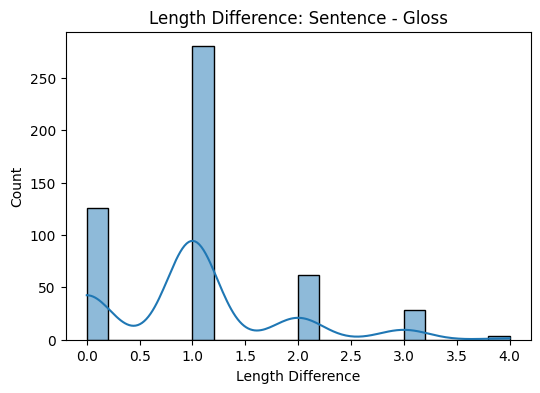

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['sentence_len'] - df['gloss_len'], bins=20, kde=True)
plt.title('Length Difference: Sentence - Gloss')
plt.xlabel('Length Difference')
plt.ylabel('Count')
plt.show()


## Additional Visualizations

Here are some additional plots that can provide further insights into the dataset:

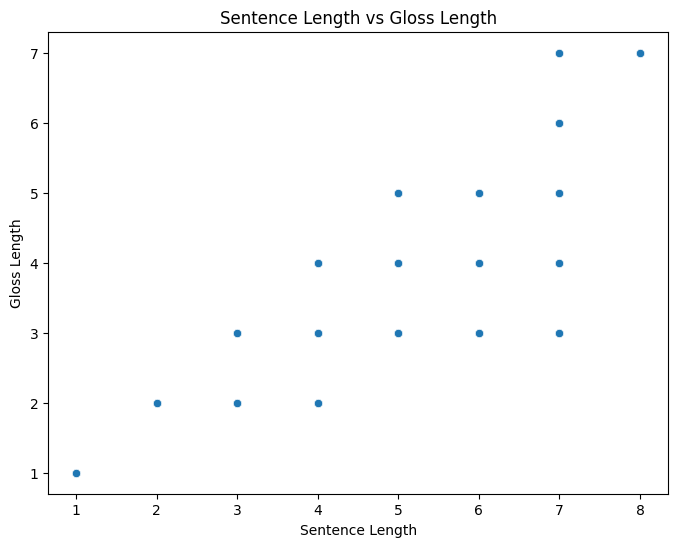

In [14]:
# Scatter plot of Sentence Length vs Gloss Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentence_len', y='gloss_len', data=df)
plt.title('Sentence Length vs Gloss Length')
plt.xlabel('Sentence Length')
plt.ylabel('Gloss Length')
plt.show()

/tmp/ipython-input-16-319373739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(glosses), palette='viridis')


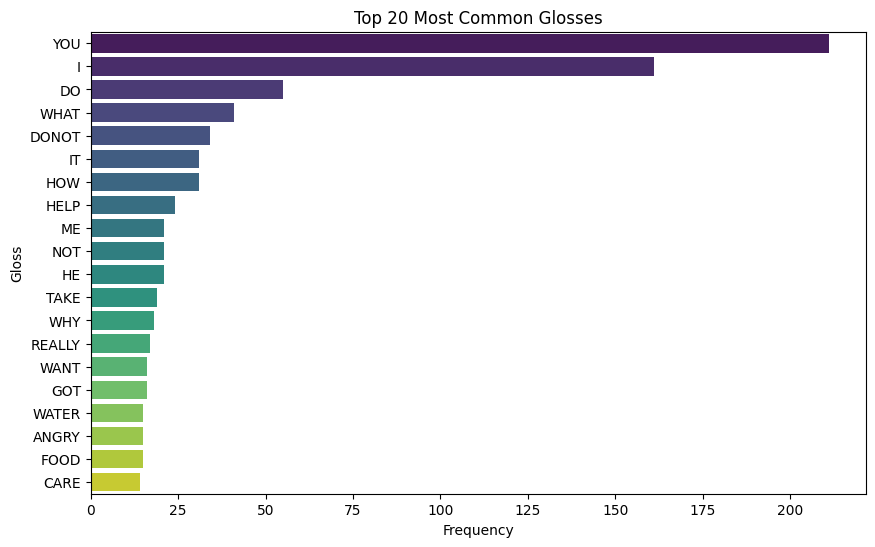

In [16]:
# Bar plot of the most common glosses
most_common_glosses = vocab.most_common(20)
glosses, counts = zip(*most_common_glosses)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(glosses), palette='viridis')
plt.title('Top 20 Most Common Glosses')
plt.xlabel('Frequency')
plt.ylabel('Gloss')
plt.show()

This scatter plot visualizes the relationship between the length of sentences and the length of their corresponding gloss sequences.

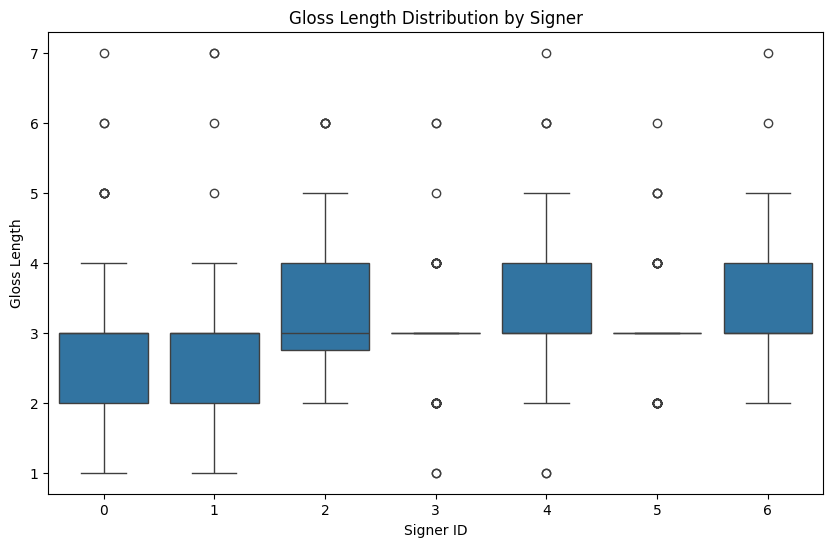

In [15]:
# Box plot of Gloss Length by Signer
plt.figure(figsize=(10, 6))
sns.boxplot(x='signer_id', y='gloss_len', data=df)
plt.title('Gloss Length Distribution by Signer')
plt.xlabel('Signer ID')
plt.ylabel('Gloss Length')
plt.show()

This box plot shows the distribution of gloss lengths for each signer, allowing for a comparison of their glossing styles in terms of length.

This bar plot displays the 20 most frequently occurring glosses in the dataset, providing insight into the most common signs used.

## Signer-wise Sentence and Gloss Statistics

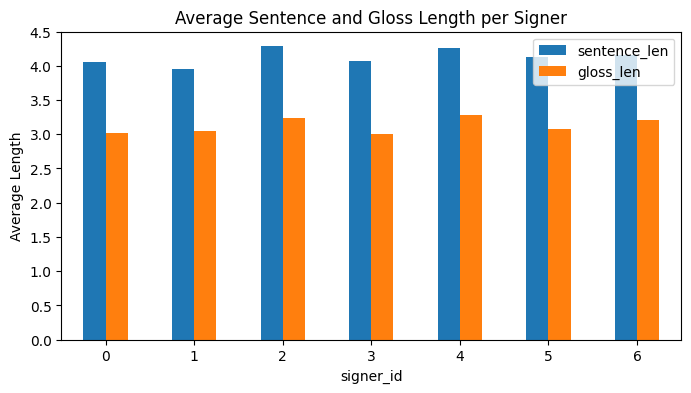

In [9]:
agg_stats = df.groupby('signer_id')[['sentence_len', 'gloss_len']].mean()
agg_stats.plot(kind='bar', figsize=(8,4), title='Average Sentence and Gloss Length per Signer')
plt.ylabel('Average Length')
plt.xticks(rotation=0)
plt.show()


## Gloss Vocabulary Extraction

In [10]:
all_glosses = ' '.join(df['gloss_sequence'].dropna()).split()
vocab = Counter(all_glosses)
print(f'Total unique glosses: {len(vocab)}')
vocab.most_common(10)


Total unique glosses: 153


[('YOU', 211),
 ('I', 161),
 ('DO', 55),
 ('WHAT', 41),
 ('DONOT', 34),
 ('IT', 31),
 ('HOW', 31),
 ('HELP', 24),
 ('ME', 21),
 ('NOT', 21)]

In [11]:
with open('gloss_vocab.txt', 'w') as f:
    for token in sorted(vocab):
        f.write(f"{token}\n")
print("Gloss vocabulary saved to gloss_vocab.txt")


Gloss vocabulary saved to gloss_vocab.txt


## Gloss-to-Sentence Alignment Preview

In [12]:
df_sample = df.sample(5, random_state=42)
for i, row in df_sample.iterrows():
    print(f"\nSentence: {row['Sentences']}\nGloss: {row['gloss_sequence']}\n---")



Sentence: you are good
Gloss: YOU GOOD
---

Sentence: it was nice chatting with you
Gloss: YOU CHAT NICE
---

Sentence: i got hurt
Gloss: I GOT HURT
---

Sentence: you can do it
Gloss: YOU DO IT
---

Sentence: he came by train
Gloss: HE TRAIN CAME 
---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from google.colab import drive
from google.colab import sheets

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta.csv')
df.head()

sheet = sheets.InteractiveSheet(df=df)

df = df.drop_duplicates()
df = df.dropna(subset=['Sentences', 'gloss_sequence'])
df.reset_index(drop=True, inplace=True)

df['sentence_len'] = df['Sentences'].apply(lambda x: len(str(x).split()))
df['gloss_len'] = df['gloss_sequence'].apply(lambda x: len(str(x).split()))
df[['sentence_len', 'gloss_len']].describe()

plt.figure(figsize=(6,4))
sns.histplot(df['sentence_len'] - df['gloss_len'], bins=20, kde=True)
plt.title('Length Difference: Sentence - Gloss')
plt.xlabel('Length Difference')
plt.ylabel('Count')
plt.show()

agg_stats = df.groupby('signer_id')[['sentence_len', 'gloss_len']].mean()
agg_stats.plot(kind='bar', figsize=(8,4), title='Average Sentence and Gloss Length per Signer')
plt.ylabel('Average Length')
plt.xticks(rotation=0)
plt.show()

all_glosses = ' '.join(df['gloss_sequence'].dropna()).split()
vocab = Counter(all_glosses)
print(f'Total unique glosses: {len(vocab)}')
vocab.most_common(10)

with open('gloss_vocab.txt', 'w') as f:
    for token in sorted(vocab):
        f.write(f"{token}\n")
print("Gloss vocabulary saved to gloss_vocab.txt")

df_sample = df.sample(5, random_state=42)
for i, row in df_sample.iterrows():
    print(f"\nSentence: {row['Sentences']}\nGloss: {row['gloss_sequence']}\n---")

# Scatter plot of Sentence Length vs Gloss Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentence_len', y='gloss_len', data=df)
plt.title('Sentence Length vs Gloss Length')
plt.xlabel('Sentence Length')
plt.ylabel('Gloss Length')
plt.show()

# Box plot of Gloss Length by Signer
plt.figure(figsize=(10, 6))
sns.boxplot(x='signer_id', y='gloss_len', data=df)
plt.title('Gloss Length Distribution by Signer')
plt.xlabel('Signer ID')
plt.ylabel('Gloss Length')
plt.show()

# Bar plot of the most common glosses
most_common_glosses = vocab.most_common(20)
glosses, counts = zip(*most_common_glosses)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(glosses), palette='viridis')
plt.title('Top 20 Most Common Glosses')
plt.xlabel('Frequency')
plt.ylabel('Gloss')
plt.show()